In [ ]:
pip install imblearn --q

In [ ]:
pip install tensorflow --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 574.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 71.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 104.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.1 MB/s eta 0:00:00


In [ ]:
pip install keras --q

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import EditedNearestNeighbours
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set the path to your file (adjust the path based on your Drive structure)
file_path = "/content/drive/My Drive/credit_card_transactions.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())


   Unnamed: 0 trans_date_trans_time            cc_num  \
0           0   2019-01-01 00:00:18  2703186189652095   
1           1   2019-01-01 00:00:44      630423337322   
2           2   2019-01-01 00:00:51    38859492057661   
3           3   2019-01-01 00:01:16  3534093764340240   
4           4   2019-01-01 00:03:06   375534208663984   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      long city_pop  \
0    Banks      F                561 Perry Cove  ...  -81.1781     3495   
1     Gill      F  43039 Riley Greens Suite 393  ... -11

In [ ]:
data.shape

(1296675, 24)

In [ ]:
data.drop(columns=['Unnamed: 0','first', 'last', 'street', 'dob', 'trans_num'], inplace=True)

In [ ]:
data.shape

(1296675, 18)

In [ ]:

print(data.isnull().sum())

trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
gender                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64


In [ ]:
print(data.dtypes)


trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
gender                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Encode categorical columns (e.g., merchant, category, state, job)
cat_cols = ['merchant', 'category', 'state', 'job']
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])


Main method for merch_zipcode

In [ ]:
data.isnull().sum()

,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
gender,0
city,0
state,0
zip,0
lat,0


In [ ]:
data.dropna(subset=['merch_zipcode'], inplace=True)

In [ ]:
data.shape

(1100702, 18)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']] = scaler.fit_transform(
    data[['amt', 'lat', 'long', 'merch_lat', 'merch_long']]
)

In [ ]:
# Drop original 'trans_date_trans_time' and 'unix_time' if not needed
data.drop(columns=['trans_date_trans_time'], inplace=True)

# Display processed data
print(data.head())

             cc_num  merchant  category       amt gender            city  \
0  2703186189652095       514         8 -0.404364      F  Moravian Falls   
2    38859492057661       390         0  0.928428      M      Malad City   
4   375534208663984       297         9 -0.175211      M        Doe Hill   
5  4767265376804500       607         2  0.151080      F          Dublin   
7  6011360759745864       107         2  0.008719      M        Edinburg   

   state    zip       lat      long  city_pop  job   unix_time  merch_lat  \
0     27  28654 -0.537627  0.620813      3495  370  1325376018  -0.553588   
2     13  83252  0.797243 -1.908302      4154  307  1325376051   1.006061   
4     45  24433 -0.025314  0.760369        99  116  1325376186   0.028315   
5     38  18917  0.402207  1.106850      2158  479  1325376248   0.460505   
7     45  22824  0.067111  0.830554      6018  127  1325376308   0.087973   

   merch_long  is_fraud  merch_zipcode  
0    0.550580         0        28705.0 

In [ ]:
data.head()

,cc_num,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2703186189652095,514,8,-0.404364,F,Moravian Falls,27,28654,-0.537627,0.620813,3495,370,1325376018,-0.553588,0.550580,0,28705.0
2,38859492057661,390,0,0.928428,M,Malad City,13,83252,0.797243,-1.908302,4154,307,1325376051,1.006061,-1.899494,0,83236.0
4,375534208663984,297,9,-0.175211,M,Doe Hill,45,24433,-0.025314,0.760369,99,116,1325376186,0.028315,0.828566,0,22844.0
5,4767265376804500,607,2,0.151080,F,Dublin,38,18917,0.402207,1.106850,2158,479,1325376248,0.460505,1.030374,0,17972.0
7,6011360759745864,107,2,0.008719,M,Edinburg,45,22824,0.067111,0.830554,6018,127,1325376308,0.087973,0.836066,0,22644.0


In [ ]:
data['gender'] = data['gender'].map({'M': 0, 'F': 1})

In [ ]:

data['city'] = LabelEncoder().fit_transform(data['city'])

In [ ]:
pip install imblearn --q

In [ ]:
from imblearn.under_sampling import EditedNearestNeighbours

X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:

# Step 3: Train and evaluate the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate KNN
knn_preds = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))


KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    218021
           1       0.88      0.27      0.42      1252

    accuracy                           1.00    219273
   macro avg       0.94      0.64      0.71    219273
weighted avg       1.00      1.00      0.99    219273

KNN Confusion Matrix:
 [[217974     47]
 [   909    343]]


In [ ]:
# Step 4: Build and train the DNN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 125s 2ms/step - accuracy: 0.9892 - loss: 69507301244928.0000 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 2/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 143s 2ms/step - accuracy: 0.9943 - loss: 0.0354 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 3/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.9942 - loss: 0.0359 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 4/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.9943 - loss: 0.0351 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 5/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 146s 3ms/step - accuracy: 0.9942 - loss: 0.0357 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 6/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 126s 2ms/step - accuracy: 0.9942 - loss: 0.0359 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 7/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 140s 2ms/step - accuracy: 0.9941 - loss: 0.0361 - val_accuracy: 0.9943 - val_loss: 0.0352
Epoch 8/30
54819/54819 ━━━━━━━━━━━━━━━━━━━━ 142s 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


DNN Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    218021
           1       0.00      0.00      0.00      1252

    accuracy                           0.99    219273
   macro avg       0.50      0.50      0.50    219273
weighted avg       0.99      0.99      0.99    219273

DNN Confusion Matrix:
 [[218021      0]
 [  1252      0]]
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


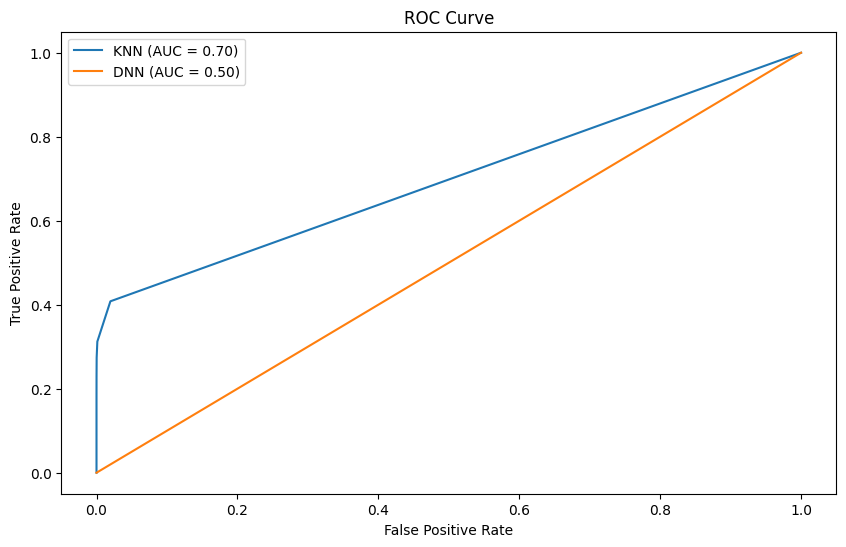

In [ ]:

# Train the model
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=30, batch_size=16, verbose=1, shuffle=True
)

# Evaluate the model
dnn_preds = (model.predict(X_test) > 0.5).astype(int)
print("DNN Classification Report:\n", classification_report(y_test, dnn_preds))
print("DNN Confusion Matrix:\n", confusion_matrix(y_test, dnn_preds))

# Plot ROC curves for both models
import matplotlib.pyplot as plt

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
dnn_fpr, dnn_tpr, _ = roc_curve(y_test, model.predict(X_test))

plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {auc(knn_fpr, knn_tpr):.2f})')
plt.plot(dnn_fpr, dnn_tpr, label=f'DNN (AUC = {auc(dnn_fpr, dnn_tpr):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


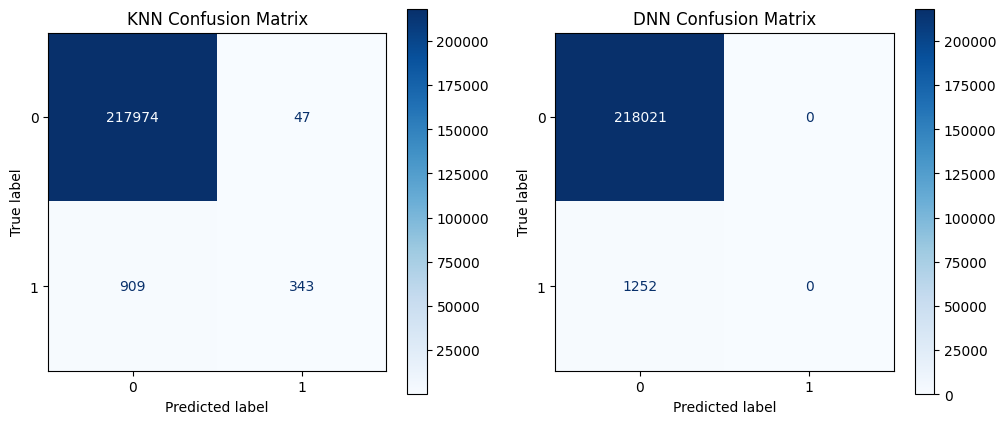

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrices
knn_cm = confusion_matrix(y_test, knn_preds)
dnn_cm = confusion_matrix(y_test, dnn_preds)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN Confusion Matrix
ConfusionMatrixDisplay(knn_cm).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('KNN Confusion Matrix')

# DNN Confusion Matrix
ConfusionMatrixDisplay(dnn_cm).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('DNN Confusion Matrix')

plt.show()